In [1]:
from sklearn.datasets import load_boston
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Regression Metrics

**1.1 Explained Variance Score**

In [3]:
from sklearn.metrics import explained_variance_score
y_true=[3,-0.5,2,7]
y_pred=[2.5,0,2,8]
explained_variance_score(y_true,y_pred)

0.9571734475374732

In [7]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(explained_variance_score(y_true,y_pred))
print(explained_variance_score(y_true,y_pred,multioutput='raw_values'))
print(explained_variance_score(y_true,y_pred,multioutput=[0.3,0.7]))

0.9838709677419355
[0.96774194 1.        ]
0.9903225806451612


**1.2 Max Error**

In [9]:
from sklearn.metrics import max_error
y_true = [3, 2, 7, 1]
y_pred = [9, 2, 7, 1]
max_error(y_true, y_pred)

6

**1.3 Mean absolute error**

In [10]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(mean_absolute_error(y_true, y_pred))
print(mean_absolute_error(y_true, y_pred, multioutput='raw_values'))
print(mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7]))

0.75
[0.5 1. ]
0.85


**1.4 Mean squared error**

In [11]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred))
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(mean_squared_error(y_true, y_pred))

0.375
0.7083333333333334


**1.5 Mean squared logarithmic error**

In [12]:
from sklearn.metrics import mean_squared_log_error
y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5, 4, 8]
print(mean_squared_log_error(y_true, y_pred))
y_true = [[0.5, 1], [1, 2], [7, 6]]
y_pred = [[0.5, 2], [1, 2.5], [8, 8]]
print(mean_squared_log_error(y_true, y_pred))

0.03973012298459379
0.044199361889160536


**1.6 Median absolute error**

In [13]:
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

0.5

**1.7 R² score, the coefficient of determination**

In [14]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(r2_score(y_true, y_pred))
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(r2_score(y_true, y_pred, multioutput='variance_weighted'))
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
r2_score(y_true, y_pred, multioutput='uniform_average')
r2_score(y_true, y_pred, multioutput='raw_values')
print(r2_score(y_true, y_pred, multioutput=[0.3, 0.7]))

0.9486081370449679
0.9382566585956417
0.9253456221198156


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


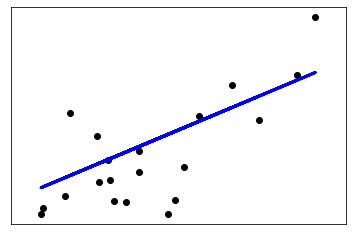

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

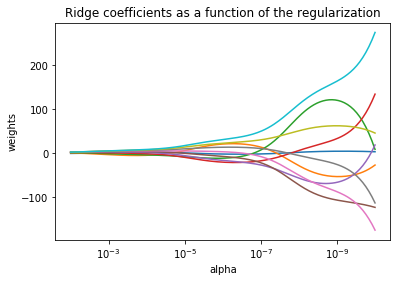

In [23]:
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

#### Assumption 1: Linearity of residuals

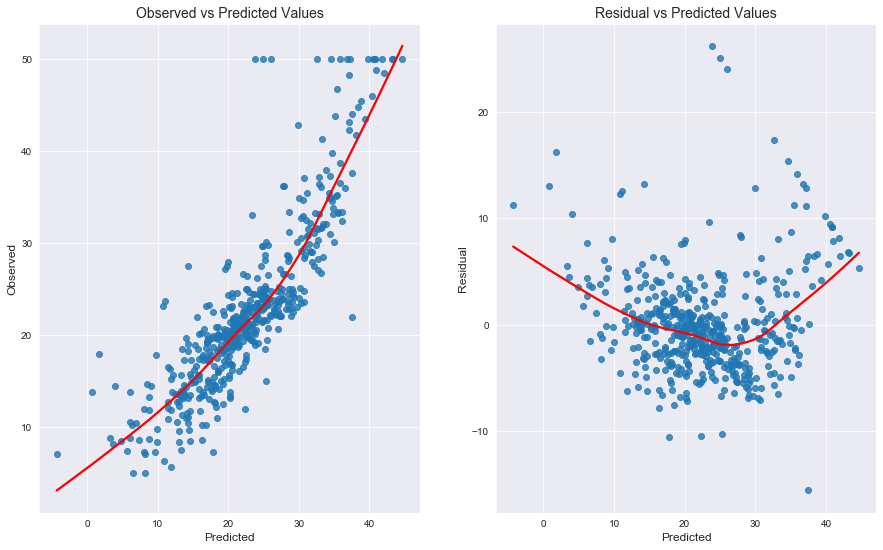

In [23]:
def linearity_test(model,y):
    fitted_val=model.predict()
    resid=model.resid

    fig, ax=plt.subplots(1,2,figsize=(15,9))

    sns.regplot(x=fitted_val,y=y,ax=ax[0],line_kws={'color':'red'}, lowess=True)
    ax[0].set_xlabel('Predicted',fontsize=12)
    ax[0].set_ylabel('Observed',fontsize=12)
    ax[0].set_title('Observed vs Predicted Values',fontsize=14)
    sns.regplot(x=fitted_val,y=resid,ax=ax[1],line_kws={'color':'red'}, lowess=True)
    ax[1].set_xlabel('Predicted',fontsize=12)
    ax[1].set_ylabel('Residual',fontsize=12)
    ax[1].set_title('Residual vs Predicted Values',fontsize=14)
linearity_test(lin_reg,y)

**Rainbow Test**

In [24]:
sm.stats.diagnostic.linear_rainbow(res=lin_reg)

(0.5808507639614259, 0.999988852262534)

In [25]:
lin_reg.resid.mean()

6.392778269857423e-15

#### Assumption 2: Normality of Residuals

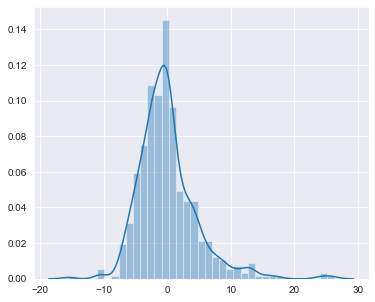

In [26]:
sns.mpl.rcParams['figure.figsize']=(6,5)
sns.distplot(lin_reg.resid)
plt.show()

In [27]:
import scipy.stats as st

In [28]:
st.jarque_bera(lin_reg.resid) #uses test of goodness-of-fit

(783.1262780507673, 0.0)

The Chisquare value of above Jarque-Bera test is 783 which is greater than 5.99(chi^2 for 5% of significance level)
so we reject the null hypothesis that the residuals are normally distributed. Also we can look for p-value which is 0.00 which is less than 0.05 means we reject the null hypothesis.

In [29]:
st.shapiro(lin_reg.resid)

(0.9013808369636536, 1.4802261404015972e-17)

The Shapiro-Wilk test tests the null hypothesis that the
data was drawn from a normal distribution.

anderson : The Anderson-Darling test for normality
kstest : The Kolmogorov-Smirnov test for goodness of fit.

In [30]:
st.anderson(lin_reg.resid,dist='norm')

AndersonResult(statistic=10.520674848600493, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

The Anderson-Darling tests the null hypothesis that a sample is
drawn from a population that follows a particular distribution.
For the Anderson-Darling test, the critical values depend on
which distribution is being tested against.  This function works
for normal, exponential, logistic, or Gumbel (Extreme Value
Type I) distributions.

Critical values provided are for the following significance levels:

normal/exponenential
    15%, 10%, 5%, 2.5%, 1%
If the returned statistic is larger than these critical values then
for the corresponding significance level, the null hypothesis that
the data come from the chosen distribution can be rejected.

In [31]:
st.kstest(lin_reg.resid,cdf='norm')

KstestResult(statistic=0.33285898203511466, pvalue=1.791523576604697e-50)

Kolmogorov-Smirnov test for goodness of fit.

This performs a test of the distribution F(x) of an observed
random variable against a given distribution G(x). Under the null
hypothesis, the two distributions are identical, F(x)=G(x). The
alternative hypothesis can be either 'two-sided' (default), 'less'
or 'greater'. The KS test is only valid for continuous distributions.

#### Assumption 3: Independence of errors means no-autocorrelation

Durbin-Watson Test, Breusch-Godfrey Test

**Assumption 4: No Multicollinearity**

VIF and Correlation Coefficient

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=[variance_inflation_factor(X_cos.values,i) for i in range(X_cos.shape[1])]

In [33]:
pd.DataFrame({'VIF':VIF[1:]},index=X.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
VIF,1.792192,2.298758,3.991596,1.073995,4.39372,1.933744,3.100826,3.955945,7.484496,9.008554,1.799084,1.348521,2.941491


**Assumption 5: No Heteroscedasticity**

For removing this heteroscedasticity we do transformations.

In [22]:
sns.set_style('darkgrid')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.7103879080674731
R^2 score for test: 0.7836295385076268


###  Checking Assumptions For linear Regression

In [17]:
import statsmodels.api as sm

In [18]:
X_cos=sm.add_constant(X)

In [19]:
lin_reg=sm.OLS(y,X_cos).fit()

In [20]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          6.72e-135
Time:                        11:53:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Assumption 1: Linearity of residuals**

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [34]:
df1=df.copy()

In [35]:
df1.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [36]:
X=df1.drop('Price',axis=1)
y=df['Price']

In [37]:
X_constant=sm.add_constant(X)

In [38]:
model=sm.OLS(y,X_constant).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          6.72e-135
Time:                        11:53:05   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

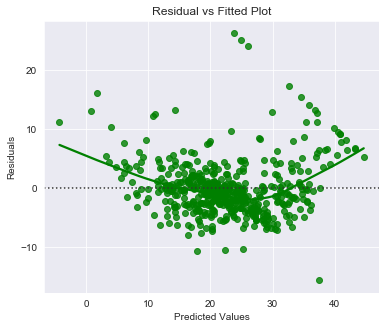

In [40]:
sns.residplot(y=model.resid,x=model.predict(X_constant), lowess=True,color='g')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted Plot')
plt.show()

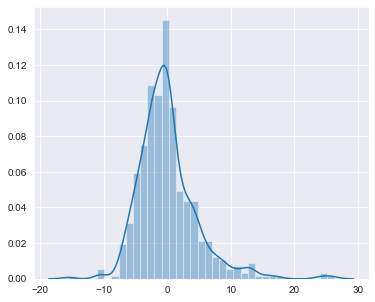

In [41]:
sns.distplot(model.resid)
plt.show()

**Transformations**

In [42]:
df2=df.copy()

In [43]:
df2=df2.transform(lambda x: np.sqrt(x))

In [44]:
X = df2.drop('Price',axis=1)
y = df2.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          5.21e-162
Time:                        11:53:06   Log-Likelihood:                -278.08
No. Observations:                 506   AIC:                             584.2
Df Residuals:                     492   BIC:                             643.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1299      0.908     11.161      0.000       8.347      11.913
CRIM          -0.1512      0.027     -5.638      0.000      -0.204      -0.098
ZN             0.0153      0.010      1.489      0.137      -0.005       0.035
INDUS         -0.0161      0.035     -0.456      0.648      -0.085       0.053
CHAS           0.2378      0.077      3.070      0.002       0.086       0.390
NOX           -2.8083      0.558     -5.033      0.000      -3.905      -1.712
RM             1.0707      0.191      5.594      0.000       0.695       1.447
AGE            0.0116      0.016      0.711      0.478      -0.021       0.044
DIS           -0.6481      0.081     -8.044      0.000      -0.806      -0.490
RAD            0.2430      0.037      6.532      0.000       0.170       0.316
TAX           -0.0447      0.012     -3.785      0.000      -0.068      -0.022
PTRATIO       -0.7331      0.099     -7.408      0.000      -0.928      -0.539
B              0.0212      0.006      3.488      0.001       0.009       0.033
LSTAT         -0.5275      0.035    -15.286      0.000      -0.595      -0.460
==============================================================================
Omnibus:                       81.549   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.809
Skew:                           0.807   Prob(JB):                     1.67e-46
Kurtosis:                       5.719   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

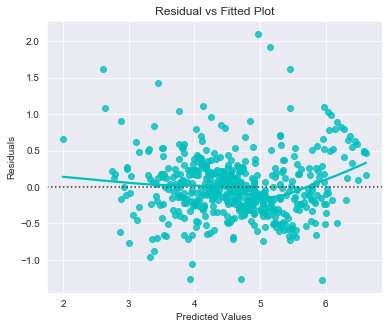

In [45]:
sns.residplot(y=model.resid,x=model.predict(X_constant), lowess=True,color='c')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted Plot')
plt.show()

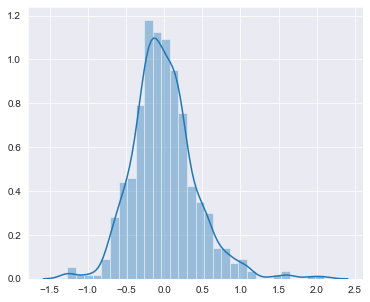

In [46]:
sns.distplot(model.resid)
plt.show()

In [47]:
df3 = df.copy()
df3 = df3.transform(lambda X: np.log1p(X))
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.006300,2.944439,1.196948,0.0,0.430483,2.024853,4.192680,1.627278,0.693147,5.693732,2.791165,5.986201,1.788421,3.218876
1,0.026944,0.000000,2.088153,0.0,0.384582,2.004314,4.380776,1.786261,1.098612,5.493061,2.933857,5.986201,2.316488,3.117950
2,0.026924,0.000000,2.088153,0.0,0.384582,2.102303,4.128746,1.786261,1.098612,5.493061,2.933857,5.975919,1.615420,3.575151
3,0.031857,0.000000,1.156881,0.0,0.377066,2.079192,3.845883,1.954757,1.386294,5.407172,2.980619,5.980479,1.371181,3.538057
4,0.066770,0.000000,1.156881,0.0,0.377066,2.097650,4.010963,1.954757,1.386294,5.407172,2.980619,5.986201,1.845300,3.616309


In [48]:
X = df3.drop('Price',axis=1)
y = df3.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          1.09e-161
Time:                        11:53:06   Log-Likelihood:                 168.22
No. Observations:                 506   AIC:                            -308.4
Df Residuals:                     492   BIC:                            -249.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1629      0.460     13.387      0.000       5.258       7.067
CRIM          -0.1391      0.019     -7.400      0.000      -0.176      -0.102
ZN            -0.0041      0.008     -0.534      0.593      -0.019       0.011
INDUS         -0.0111      0.023     -0.478      0.633      -0.057       0.035
CHAS           0.1289      0.046      2.783      0.006       0.038       0.220
NOX           -0.9453      0.241     -3.928      0.000      -1.418      -0.472
RM             0.3868      0.114      3.399      0.001       0.163       0.610
AGE            0.0272      0.021      1.325      0.186      -0.013       0.068
DIS           -0.2493      0.042     -5.932      0.000      -0.332      -0.167
RAD            0.1717      0.024      7.184      0.000       0.125       0.219
TAX           -0.1311      0.043     -3.064      0.002      -0.215      -0.047
PTRATIO       -0.6046      0.090     -6.731      0.000      -0.781      -0.428
B              0.0409      0.012      3.375      0.001       0.017       0.065
LSTAT         -0.4266      0.026    -16.512      0.000      -0.477      -0.376
==============================================================================
Omnibus:                       39.017   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.146
Skew:                           0.119   Prob(JB):                     3.74e-36
Kurtosis:                       5.772   Cond. No.                         665.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Feature Selection

**1. Using Pearson Correlation**

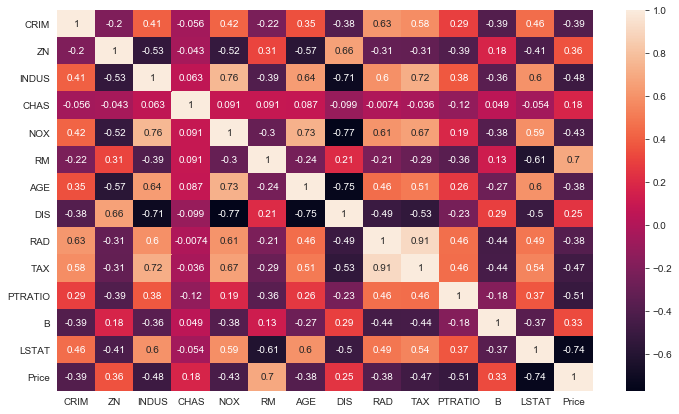

In [49]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [50]:
cor=abs(df.corr()['Price'])

In [51]:
relevfeat=cor[cor>0.5]

In [52]:
relevfeat

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
Price      1.000000
Name: Price, dtype: float64

**2. Wrapper Method**

**2.1 Forward Selection:** Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

**2.2 Backward Elimination:** In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

**2.3 Recursive Feature elimination:** It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [53]:
X = df.drop('Price',axis=1)
y = df.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.pvalues

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

**Backward elimination**

In [54]:
cols=list(X.columns)
while(len(cols)>0):
    x1=sm.add_constant(X[cols])
    model=sm.OLS(y,x1).fit()
    p=model.pvalues
    pmax=max(model.pvalues)
    irfeat=p.idxmax()
    if(pmax>0.05):
        cols.remove(irfeat)
    else:
        break
print(cols)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


**Recursive Feature elimination**

In [55]:
model=LinearRegression()
from sklearn.feature_selection import RFE
rfe=RFE(model,10)
X_rfe=rfe.fit_transform(X,y)
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
temp=pd.Series(rfe.support_,index=X.columns)
print(temp[temp.values==True].index)

[ True  True  True  True  True  True False  True  True False  True False
  True]
[1 1 1 1 1 1 4 1 1 2 1 3 1]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'LSTAT'],
      dtype='object')


**Step Forward Selection**

In [56]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [57]:
clf = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
frse=sfs(clf,k_features=10,verbose=2,forward=True,floating=False,scoring='r2',cv=5)
frse=frse.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2020-03-25 11:53:10] Features: 1/10 -- score: 0.5356803659242583[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2020-03-25 11:53:11] Features: 2/10 -- score: 0.6306660510100729[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2020-03-25 11:53:11] Features: 3/10 -- score: 0.6913571755754858[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [58]:
feat_cols=frse.k_feature_idx_
feat_cols

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [59]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

### 3. Embedded method

In [60]:
from sklearn.linear_model import LassoCV, RidgeCV
reg=LassoCV()

In [61]:
reg.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [62]:
reg.alpha_

0.7248204283772595

In [63]:
reg.score(X,y)

0.7024437179872696

In [64]:
lsdf=pd.DataFrame(reg.coef_,index=X.columns,columns=['LassoCVCoef'])

In [65]:
lsdf[lsdf['LassoCVCoef']!=0].index

Index(['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

Text(0.5, 1.0, 'Feature importance using Lasso Model')

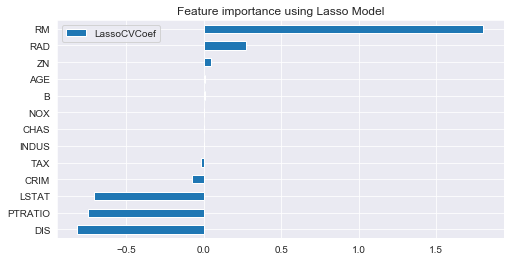

In [66]:
imp_coef=lsdf.sort_values(by='LassoCVCoef')
import matplotlib
matplotlib.rcParams['figure.figsize']=(8.0,4.0)
imp_coef.plot(kind='barh')
plt.title("Feature importance using Lasso Model")

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(X.values,j) for j in range(1,X.shape[1])]


[2.8440132669462646,
 14.485757706539308,
 1.1529518589418777,
 73.89494652814788,
 77.94828304638538,
 21.38685048994314,
 14.6996523837492,
 15.167724857920897,
 61.227274009649456,
 85.02954731061801,
 20.104942636229136,
 11.102024772203539]

In [68]:
def calculate_vif(x):
    threshold=5.0
    lencols=x.shape[1]
    output=pd.DataFrame()
    vif=[variance_inflation_factor(x.values,j) for j in range (0,lencols)]
    for i in range(1,lencols):
        a=np.argmax(vif)
        if vif[a]<=threshold:
            break
        if i==1:
            output=x.drop(x.columns[a],axis=1)
            vif=[variance_inflation_factor(output.values,j) for j in range (0,output.shape[1])]
        elif i>1:
            output=output.drop(output.columns[a],axis=1)
            vif=[variance_inflation_factor(output.values,j) for j in range (0,output.shape[1])]
    return(output)

In [69]:
train_out = calculate_vif(X)

In [70]:
train_out.head()

,CRIM,ZN,CHAS,DIS,RAD,LSTAT
0,0.00632,18.0,0.0,4.0900,1.0,4.98
1,0.02731,0.0,0.0,4.9671,2.0,9.14
2,0.02729,0.0,0.0,4.9671,2.0,4.03
3,0.03237,0.0,0.0,6.0622,3.0,2.94
4,0.06905,0.0,0.0,6.0622,3.0,5.33


### Regularization - Lasso , Ridge , Elastic Net

In [71]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [72]:
newX=df.drop('Price',axis=1)
newY=df['Price']

In [73]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

152 152


### Ridge Regression

In [81]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.01)
rr.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [84]:
rr100=Ridge(alpha=100)
rr100.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [85]:
train_score=lr.score(X_train,y_train)
test_score=lr.score(X_test,y_test)

rrtrain_score=rr.score(X_train,y_train)
rrtest_score=rr.score(X_test,y_test)

rr100train_score=rr100.score(X_train,y_train)
rr100test_score=rr100.score(X_test,y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", rrtrain_score)
print("ridge regression test score low alpha:", rrtrain_score)
print("ridge regression train score high alpha:", rr100train_score)
print("ridge regression test score high alpha:", rr100train_score)

linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576849
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7419030253527293
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.7172809669938278
